<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Vivas_Montolla_TP3_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Ludmila Vivas Montolla**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## ✅ Resolución:

El dataset elegido es **Student Performance**.
Link (https://archive.ics.uci.edu/dataset/320/student+performance )

In [105]:
pip install ucimlrepo

In [106]:
from ucimlrepo import fetch_ucirepo

student_performance = fetch_ucirepo(id=320)

x = student_performance.data.features
y = student_performance.data.targets

In [107]:
print(x.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]


In [108]:
print(y.head())

   G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13


Por la información que nos da el dataset, me gustaria poder ver si un alumna va a aprobar.


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## ✅ Resolución:

Primero vamos a imprimir las variables para ver el tipo de dato que tenemos y si tenemos datos null.

In [109]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [110]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB
None


Vemos que todos los campos se encuentran completos, por lo que no será necesario realizar tratamiento sobre valores Null.

A continuación vamos a hacer una serie de gráficos para ver si se posee outliers de algunas categorías que nos interesan más como Edad, Absences, G1, G2 y G3.

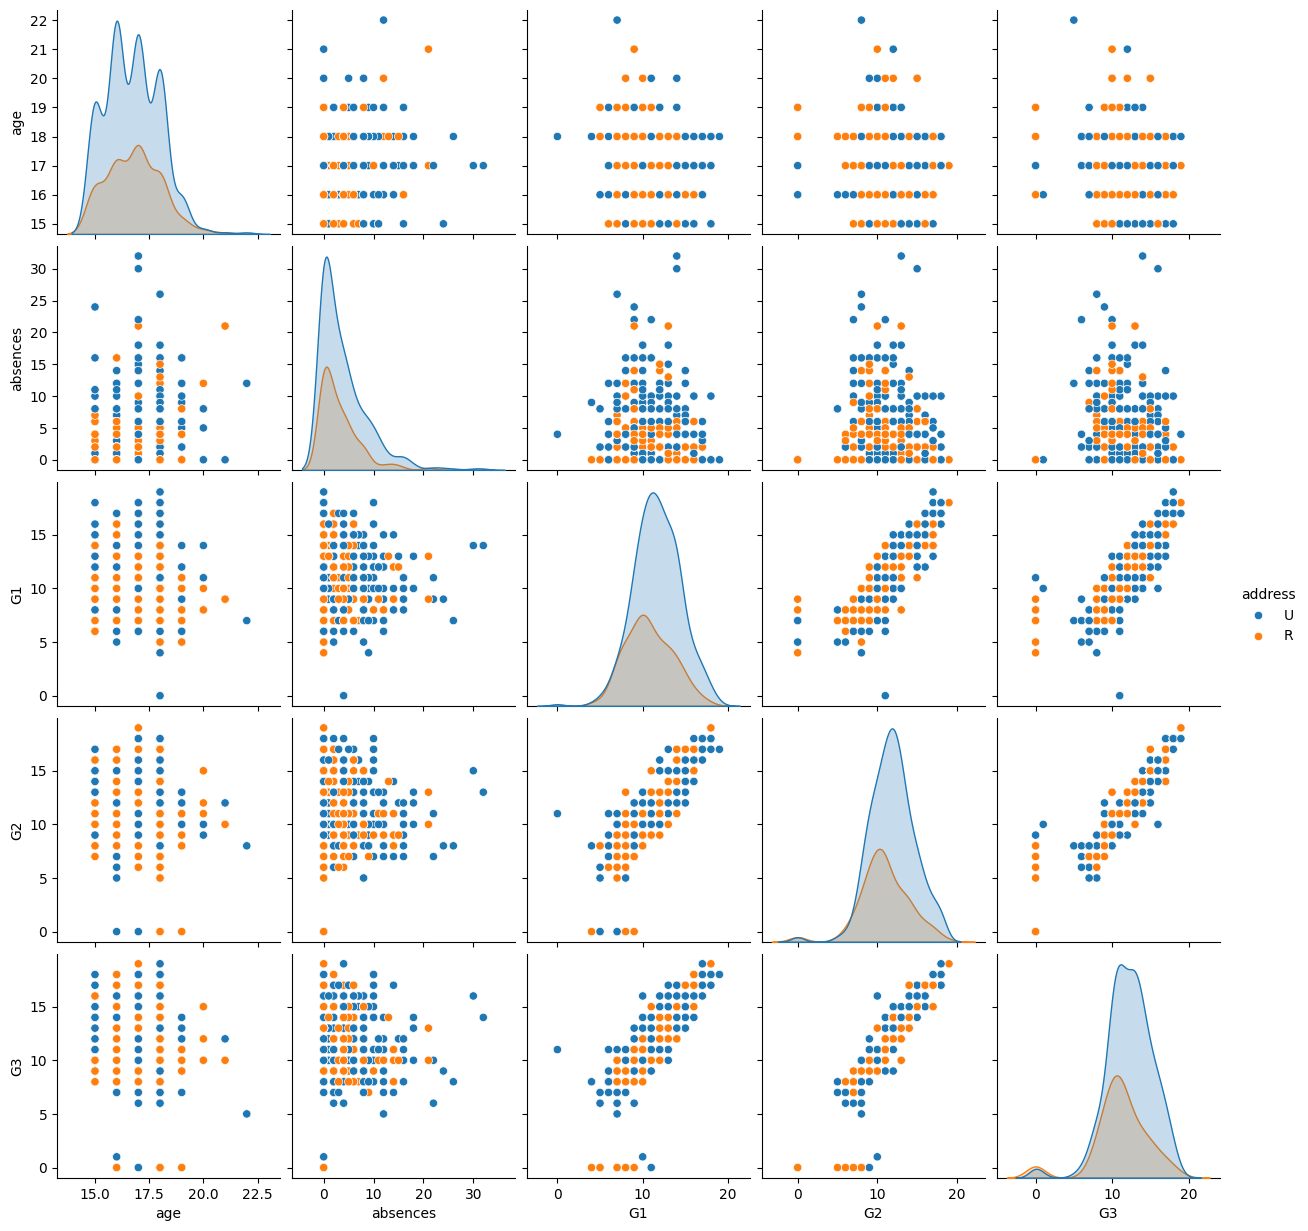

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["address", "age", "absences"]
df_plot = pd.concat([x[selected_columns], y[["G1", "G2", "G3"]]], axis=1)

sns.pairplot(df_plot, hue="address")
plt.show()

💡 Por lo que se puede ver en los graficos, parece que hay una mayor cantidad de estudiantes que pertenecen a un entorno urbano (puntos azules). Y, al contrario de lo que se esperaria, estos tienen una mayor cantidad de ausencias.

De igual manera, el tener una mayor ausentismo parece no afectar al desempeño de estos estudiantes ya que tambien poseen mejores notas.

💡 Tambien se destaca que la relacion entre G1, G2 y G3 es bastante lineal y ascendente, es decir que entre las diferentes etapas se posee una correlacion en las calificaciones.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## ✅ Resolución:

Como me interesa saber si un alumna aprueba o no, voy a tomar a G3 (nota final) como variable objetivo. Lo que voy a realizar primero es, a esta variable, modificar el tipo de dato que tienen (int) a datos booleanos (True-False) para poder aplicar un modelo de clasificacion.

Las notas que se poseen van del 0 al 20, siendo 20 la mejor; por lo que voy a cambiarlo para considerar aprobado a partir del 12.

In [112]:
y["G3_Aprobo"] = y["G3"] >= 12

<ipython-input-112-da5752b5580c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["G3_Aprobo"] = y["G3"] >= 12


In [113]:
y=y.drop(["G1", "G2","G3"], axis=1)
print(y.head())

   G3_Aprobo
0      False
1      False
2       True
3       True
4       True


Hay algunos features con los que no voy a trabajar, ya que la información que me brinda creo que no afecta tanto en el analisis que quiero hacer. Por ejemplo: los datos del trabajo de los padres o a cual de las dos escuales es a la que va.

In [114]:
x=x.drop(["school", "famsize", "Pstatus", "Medu","Fedu", "Mjob", "Fjob", "reason","guardian"], axis=1)
print(x.head())

  sex  age address  traveltime  studytime  failures schoolsup famsup paid  \
0   F   18       U           2          2         0       yes     no   no   
1   F   17       U           1          2         0        no    yes   no   
2   F   15       U           1          2         0       yes     no   no   
3   F   15       U           1          3         0        no    yes   no   
4   F   16       U           1          2         0        no    yes   no   

  activities  ... higher internet romantic famrel  freetime  goout  Dalc  \
0         no  ...    yes       no       no      4         3      4     1   
1         no  ...    yes      yes       no      5         3      3     1   
2         no  ...    yes      yes       no      4         3      2     2   
3        yes  ...    yes      yes      yes      3         2      2     1   
4         no  ...    yes       no       no      4         3      2     1   

   Walc  health  absences  
0     1       3         4  
1     1       3         

De las variables que quedan, varias son categoricas, asi que voy a aplicar One Hot Encoding para poder trabar con ellas despues.

In [115]:
x = pd.get_dummies(x, columns=["sex","address","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"])
x = x.drop(["sex_F","address_R","schoolsup_no","famsup_no","paid_no","activities_no","nursery_no","higher_no","internet_no","romantic_no"], axis=1)
x.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,sex_M,address_U,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,2,2,0,4,3,4,1,1,3,...,False,True,True,False,False,False,True,True,False,False
1,17,1,2,0,5,3,3,1,1,3,...,False,True,False,True,False,False,False,True,True,False
2,15,1,2,0,4,3,2,2,3,3,...,False,True,True,False,False,False,True,True,True,False
3,15,1,3,0,3,2,2,1,1,5,...,False,True,False,True,False,True,True,True,True,True
4,16,1,2,0,4,3,2,1,2,5,...,False,True,False,True,False,False,True,True,False,False


Para el caso del modelo con Logistic Regression si voy a escalar las columnas numericas, pero lo voy a realizar dentro del entramiento en un pipeline ya que todavia no se que otro modelo hare despues.




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

num_col = ["age", "absences", "failures", "studytime", "traveltime", "goout", "Dalc", "Walc", "health"]

std = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col)])

pipeline = Pipeline(steps=[
    ("preprocesamiento", std),
    ("clasificacion", LogisticRegression(max_iter=100))])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [128]:
print(confusion_matrix(y_test, y_pred))

[[45 43]
 [ 8 99]]


En la matriz de confusion mostrada arriba vemos que el modelo ha clasificado como Falsos positicos a 8 casos, mientras que clasifico erroneamente como Falso Negativo a 43 casos.

In [131]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7384615384615385


El acurrency del modelo es de 0.73, esto quiere decir que hay un 27% de probabilidades que la clasificacion sea erronea.

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.51      0.64        88
        True       0.70      0.93      0.80       107

    accuracy                           0.74       195
   macro avg       0.77      0.72      0.72       195
weighted avg       0.77      0.74      0.72       195



💡 El modelo tiene mejores metricas para los casos verdaderos.

💡 Se puede observar que en el caso de Verdadero, de los casos en que realmente aprobaron el modelo detecto el 93% y que el 70% de los que el modelo predijo que aprobaron estaba en lo correcto.

💡 Para el caso de los negativos, el modelo solo detecto al 51% de los que realmente desaprobaron y pero la presicion es que tiene es del 85%.

💡 Resumiendo: el modelo detecta bien los casos que el alumno aprueba, pero no a los que desaprueban.

## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

### 5.2 Entrenamiento del modelo.

Me decidi hacer un modelo con MLP asi que voy a reutilizar el paso de estandarizacion que realice en el pipeline anterior.

In [134]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline(steps=[
    ("preprocesamiento", std),
    ("clasificacion", MLPClassifier(hidden_layer_sizes=(10), max_iter=50, random_state=42))])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

mlp_pipeline.fit(x_train, y_train)
y_pred_mlp = mlp_pipeline.predict(x_test)

### 5.3 Evaluación del desempeño

In [135]:
print(confusion_matrix(y_test, y_pred_mlp))

[[46 42]
 [19 88]]


In [137]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")

Accuracy: 0.6871794871794872


In [139]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

       False       0.71      0.52      0.60        88
        True       0.68      0.82      0.74       107

    accuracy                           0.69       195
   macro avg       0.69      0.67      0.67       195
weighted avg       0.69      0.69      0.68       195



💡 Se puede ver que en comparacion con la regresion logica ha baja la cantidad de verdaderos negativos y subio bastante la cantidad de falsos positivos.

💡 Tambien ha bajado el nivel del acurrency, dando un bajo desempeño con estos parametros de la red neuronal.

💡 Si se puede ver que la diferencia de valores entre False y True es menor, pero a nivel general el modelo tiene mal desempeño.

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Voy a aumentar la cantidad de neuronas e iteraciones, y agregarle otros parametros como la activacion y alpha para ver si de esta forma rinde mejor el modelo.

In [163]:
mlp2_pipeline = Pipeline(steps=[
    ("preprocesamiento", std),
    ("clasificacion", MLPClassifier(hidden_layer_sizes=(25), max_iter=250, alpha=0.01, activation="tanh", random_state=42))])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

mlp2_pipeline.fit(x_train, y_train)
y_pred_mlp2 = mlp2_pipeline.predict(x_test)

## 6- Conclusiones

Fundamente, justifique con sus palabras.

In [165]:
print(confusion_matrix(y_test, y_pred_mlp2))

[[44 44]
 [13 94]]


In [166]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp2)}")

Accuracy: 0.7076923076923077


In [167]:
print(classification_report(y_test, y_pred_mlp2))

              precision    recall  f1-score   support

       False       0.77      0.50      0.61        88
        True       0.68      0.88      0.77       107

    accuracy                           0.71       195
   macro avg       0.73      0.69      0.69       195
weighted avg       0.72      0.71      0.69       195



💡 En comparación a la red neuronal anterior, vemos que con estos nuevos parametros mejoro el desempeño del modelo. De igual manera, sigue teniendo mejores metricas sobre este dataset la Regresion Logistica.

# Referencias

👉 Ejemplos utilizados en clases.

👉 Scikit learn (Link: https://scikit-learn.org/0.24/modules/clustering)

👉 Geeks for geeks (Link: https://www.geeksforgeeks.org/machine-learning/)